## call "~/.local/bin/poetry" if poetry keyword not working on mac

In [1]:
# TODO split based on farms

In [2]:
import datetime
import geopandas
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# TODO try only with best performing numeric columns for input into model first
# TODO select features for deep learning model after ranking features with random forest (feature importance)
# TODO lstm network
# DONE TODO SMOTE algorithm, for upsampling havested fields; we only have ~300 :(
    
    
# TODO convert image_idx into cyclic numeric values using sin or cos.
    # https://datascience.stackexchange.com/questions/17759/encoding-features-like-month-and-hour-as-categorial-or-numeric

In [4]:
#local scripts

from scripts import veg_indices, utilities, plots
#from scripts.utilities import *

In [5]:
# cpied from learning_about-data.ipynb
BANDS_DICT = {   'B2': 'Blue',
            'B3': 'Green',
            'B4': 'Red',
            'B5': 'Red_Edge_1',
            'B6': 'Red_Edge_2',
            'B7': 'Red_Edge_3',
            'B8': 'NIR',
            'B8A': 'Red_Edge_4',
            'B11': 'SWIR_1',
            'B12': 'SWIR_2'}

BANDS = list(BANDS_DICT.keys())

In [6]:
df, NUMERIC_COLS, NUM_SAMPLES = utilities.get_df("merged_images_train", veg_indices, BANDS)
test_df, _, _ = utilities.get_df("merged_images_validation", veg_indices, BANDS)

Added:  ['RVI', 'ARVI', 'PSSRa', 'NDI45', 'GNDVI', 'MCARI', 'IRECI', 'CIr', 'MTCI', 'NDVIre', 'NIRv', 'EVI', 'NDTI', 'NDMI', 'MSI', 'GCI', 'NBRI', 'BSI', 'NDWI', 'NDSI']
(not in place), created : ['RVI_diff', 'ARVI_diff', 'PSSRa_diff', 'NDI45_diff', 'GNDVI_diff', 'MCARI_diff', 'IRECI_diff', 'CIr_diff', 'MTCI_diff', 'NDVIre_diff', 'NIRv_diff', 'EVI_diff', 'NDTI_diff', 'NDMI_diff', 'MSI_diff', 'GCI_diff', 'NBRI_diff', 'BSI_diff', 'NDWI_diff', 'NDSI_diff', 'NDVI_diff', 'RVI_prev', 'ARVI_prev', 'PSSRa_prev', 'NDI45_prev', 'GNDVI_prev', 'MCARI_prev', 'IRECI_prev', 'CIr_prev', 'MTCI_prev', 'NDVIre_prev', 'NIRv_prev', 'EVI_prev', 'NDTI_prev', 'NDMI_prev', 'MSI_prev', 'GCI_prev', 'NBRI_prev', 'BSI_prev', 'NDWI_prev', 'NDSI_prev', 'NDVI_prev']
Index(['index', 'INDEX', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'NDVI', 'finHarvDat', 'lat', 'lon', 'point_idx',
       'start_date', 'end_date', 'har_evnt', 'image_idx', 'geometry', 'RVI',
       'ARVI', 'PSSRa', 'NDI45', '

In [7]:

def get_ordered_rdm_forests_features():
    # first one is the most important
    return ['RVI_diff', 'B5', 'B4', 'NDVI_diff', 'ARVI_diff', 'EVI_diff', 'B3',
       'B2', 'GNDVI_diff', 'IRECI_diff', 'ARVI', 'NDVIre_diff', 'NDWI_diff',
       'NDMI_diff', 'BSI_diff', 'B6', 'PSSRa_diff', 'B11', 'B7', 'NDSI',
       'CIr_diff', 'NDVIre', 'ARVI_prev', 'NDTI', 'MTCI', 'MSI_diff', 'B8',
       'NDI45', 'EVI_prev', 'MCARI_prev', 'NDTI_prev', 'GCI_diff', 'NDSI_prev',
       'IRECI_prev', 'MTCI_diff', 'B8A', 'BSI', 'BSI_prev', 'MCARI_diff',
       'MSI', 'NBRI_diff', 'CIr', 'NDI45_prev', 'RVI', 'NIRv_prev', 'MCARI',
       'NDSI_diff', 'NDTI_diff', 'PSSRa', 'GNDVI', 'NIRv', 'B12', 'NBRI',
       'MSI_prev', 'NDMI', 'NDWI', 'NDVI_prev', 'NDVI', 'CIr_prev', 'IRECI',
       'NIRv_diff', 'NDI45_diff', 'NBRI_prev', 'GCI', 'EVI', 'RVI_prev',
       'NDVIre_prev', 'NDWI_prev', 'NDMI_prev', 'PSSRa_prev', 'GNDVI_prev',
       'GCI_prev', 'MTCI_prev']
    

#SELECTED_FEATURES = get_manually_selected()

#SELECTED_FEATURES = NUMERIC_COLS
#SELECTED_FEATURES = train_df[SELECTED_FEATURES].dropna(axis=1).columns


SELECTED_FEATURES = get_ordered_rdm_forests_features()[:5] # get top N features

print("selected features:", SELECTED_FEATURES)

def get_X_y(dataframe: pd.DataFrame):
    df_X = dataframe[SELECTED_FEATURES]
    #df_X = df_X.dropna(axis=1)
    X = df_X.to_numpy().reshape((df_X.shape[0], df_X.shape[1], 1))
    y = dataframe["har_evnt"].to_numpy().astype(np.float32)
    return X, y

selected features: ['RVI_diff', 'B5', 'B4', 'NDVI_diff', 'ARVI_diff']


# Separate by Farm

In [8]:
from sklearn.model_selection import train_test_split

def separate_by_farm(df:pd.DataFrame):
    points_df_list = []
    for p in  df['point_idx'].unique(): # ['p0','p1','p2','p3','p4', ...]
        curr_df = df[df["point_idx"] == p]
        points_df_list.append(curr_df)
    len(points_df_list)

    training_df_list, validation_df_list = train_test_split(points_df_list, train_size=0.8, random_state=42)

    print(len(training_df_list))
    print(len(validation_df_list))

    # combine into two dataframes
    train_df = pd.concat(training_df_list)
    validate_df = pd.concat(validation_df_list)
    print(train_df.shape, validate_df.shape)
    
    return train_df, validate_df

validate_df, train_df = separate_by_farm(df)

2334
584
(12376, 84) (2950, 84)


# Random Upsampling

In [9]:
#%%script echo skipping
def apply_random_upsampling(df):
    har_evnt_true_df = df[df["har_evnt"]]
    har_evnt_false_df = df[df["har_evnt"] == False]
    print(har_evnt_true_df.shape)
    print(har_evnt_false_df.shape)

    from sklearn.utils import resample

    upsampled_har_evnt_true_df = resample(har_evnt_true_df, n_samples=har_evnt_false_df.shape[0],
                                                    replace=True, random_state=42)
    print(upsampled_har_evnt_true_df.shape)

    return pd.concat([upsampled_har_evnt_true_df, har_evnt_false_df])
    print(df.shape)

train_df = apply_random_upsampling(train_df)

(280, 84)
(2670, 84)
(2670, 84)


# Convert to Numpy

In [10]:
X_train, y_train = get_X_y(train_df)
print(X_train.shape, y_train.shape)

X_validate, y_validate = get_X_y(validate_df)
print(X_validate.shape, y_validate.shape)

X_test, y_test = get_X_y(test_df)
print(X_test.shape, y_test.shape)

(5340, 5, 1) (5340,)
(12376, 5, 1) (12376,)
(3841, 5, 1) (3841,)


In [11]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
model = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    #BatchNormalization(),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [13]:
metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()] 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)


In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_validate, y_validate), callbacks=[callback])

Epoch 1/100


2023-05-23 13:16:56.867938: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


167/167 [==============================] - 1s 2ms/step - loss: 0.5434 - precision: 0.7919 - recall: 0.7768 - val_loss: 0.4733 - val_precision: 0.2769 - val_recall: 0.8320
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: 0.4405 - precision: 0.8140 - recall: 0.8457 - val_loss: 0.4098 - val_precision: 0.3154 - val_recall: 0.8131
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 0.4056 - precision: 0.8211 - recall: 0.8697 - val_loss: 0.4091 - val_precision: 0.3038 - val_recall: 0.8401
Epoch 4/100
167/167 [==============================] - 0s 2ms/step - loss: 0.3885 - precision: 0.8241 - recall: 0.8723 - val_loss: 0.3853 - val_precision: 0.3096 - val_recall: 0.8167
Epoch 5/100
167/167 [==============================] - 0s 1ms/step - loss: 0.3825 - precision: 0.8236 - recall: 0.8779 - val_loss: 0.4345 - val_precision: 0.2892 - val_recall: 0.8751
Epoch 6/100
167/167 [==============================] - 0s 2ms/step - loss: 0.3730 - precision: 0.

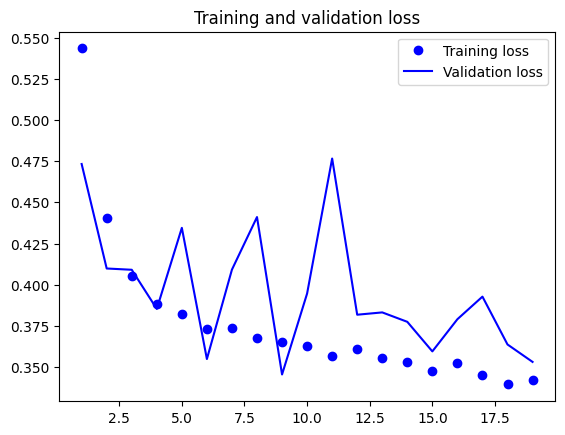

In [15]:
import matplotlib.pyplot as plt

#acc = history.history['binary_accuracy']
#val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
import sklearn
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

func = np.vectorize(lambda x: 0 if x < 0.5 else 1)

def plot_confusion_matrix(actual, predicted):
    print(metrics.confusion_matrix(actual, predicted))
    confusion_matrix = metrics.confusion_matrix(actual, predicted, normalize='true')

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

X_train
167/167 [==============================] - 0s 352us/step
(array([0, 1]), array([2576, 2764]))
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      2670
         1.0       0.85      0.88      0.87      2670

    accuracy                           0.86      5340
   macro avg       0.86      0.86      0.86      5340
weighted avg       0.86      0.86      0.86      5340

[[2261  409]
 [ 315 2355]]


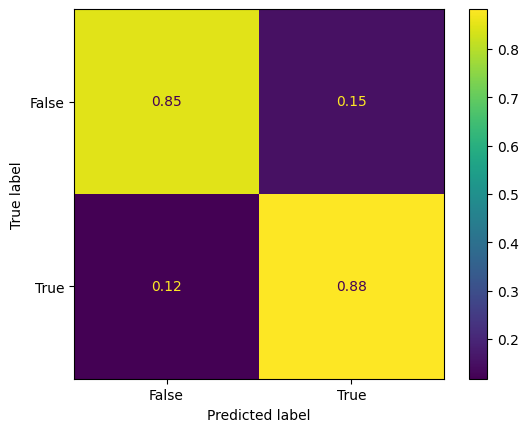

In [17]:
print("X_train")
y_predict = np.array(list(model.predict(X_train)))
y_predict = y_predict.reshape(y_predict.shape[0])
print(np.unique(func(y_predict), return_counts=True))
print(sklearn.metrics.classification_report(y_train, func(y_predict)))
plot_confusion_matrix(y_train, func(y_predict))

X_validate
387/387 [==============================] - 0s 455us/step
(array([0, 1]), array([9690, 2686]))
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91     11263
         1.0       0.34      0.82      0.48      1113

    accuracy                           0.84     12376
   macro avg       0.66      0.83      0.69     12376
weighted avg       0.92      0.84      0.87     12376

[[9488 1775]
 [ 202  911]]


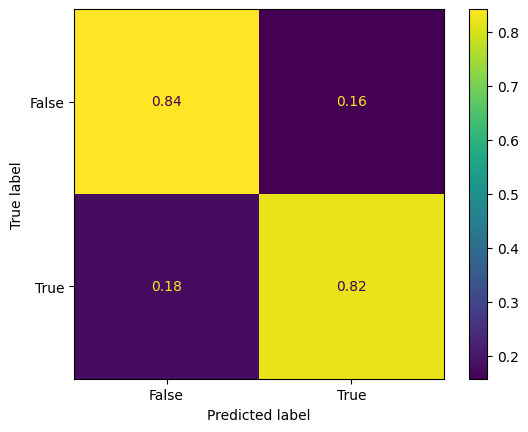

In [18]:
print("X_validate")

y_predict = np.array(list(model.predict(X_validate)))
y_predict = y_predict.reshape(y_predict.shape[0])
print(np.unique(func(y_predict), return_counts=True))
print(sklearn.metrics.classification_report(y_validate, func(y_predict)))
plot_confusion_matrix(y_validate, func(y_predict))

X_test
121/121 [==============================] - 0s 467us/step
(array([0, 1]), array([3073,  768]))
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      3528
         1.0       0.28      0.70      0.40       313

    accuracy                           0.83      3841
   macro avg       0.63      0.77      0.65      3841
weighted avg       0.91      0.83      0.86      3841

[[2978  550]
 [  95  218]]


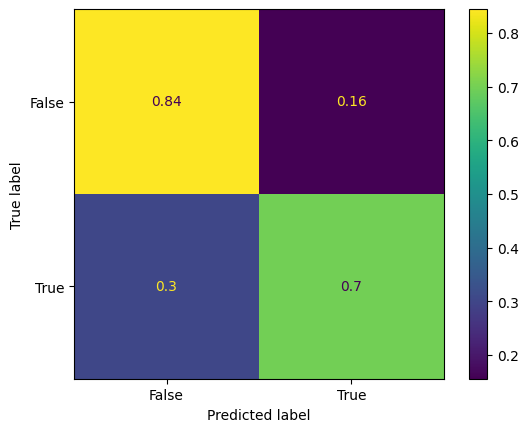

In [20]:
print("X_test")

y_predict = np.array(list(model.predict(X_test)))
y_predict = y_predict.reshape(y_predict.shape[0])
print(np.unique(func(y_predict), return_counts=True))
print(sklearn.metrics.classification_report(y_test, func(y_predict)))
plot_confusion_matrix(y_test, func(y_predict))

# Random Forests Feature Selection

In [ ]:
def rm_extradim(X, y):
    X, y = X.reshape(X.shape[0], X.shape[1]), y.reshape(y.shape[0])
    return X, y


X_train, y_train = rm_extradim(X_train, y_train)
X_validate, y_validate = rm_extradim(X_validate, y_validate)
X_test, y_test = rm_extradim(X_test, y_test)

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

In [ ]:
y_predict = rf.predict(X_validate)
print("accuracy: accuracy_score(y_validate, y_predict")
print(sklearn.metrics.classification_report(y_validate, y_predict))

plot_confusion_matrix(y_validate, func(y_predict))

In [ ]:
y_predict = rf.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_predict))
print(sklearn.metrics.classification_report(y_test, y_predict))

plot_confusion_matrix(y_test, func(y_predict))

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
feature_importances_df = pd.DataFrame(rf.feature_importances_,
                    index=SELECTED_FEATURES, 
                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_df

In [ ]:
feature_importances_df.T.columns